# TP1

### Import des Libraries

In [1]:
import numpy as np
import pandas as pd

from imblearn.over_sampling import RandomOverSampler

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

import warnings
warnings.filterwarnings('ignore')

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### Import du Dataset

In [2]:
path="./data/"
dataset=pd.read_csv(path+'train.csv')

dataset.shape

(381109, 12)

In [ ]:
dataset.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### Description de la base de données

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


### Vérification des valeurs manquantes

In [ ]:
# Affichage des Nan en %
missing_values = pd.DataFrame((dataset.isna().mean()*100).sort_values())
missing_values.columns = ['Valeurs manquantes en %']
missing_values

,Valeurs manquantes en %
id,0.0
Gender,0.0
Age,0.0
Driving_License,0.0
Region_Code,0.0
Previously_Insured,0.0
Vehicle_Age,0.0
Vehicle_Damage,0.0
Annual_Premium,0.0
Policy_Sales_Channel,0.0


* Pas de valeur manquante dans le dataset

### Doublon

In [ ]:
## Duplicate row by id
dataset.duplicated('id').sum()

0

<font size="+3" color='#3a86ff'><b> Analyse Exporatoire des Données </b></font>

In [ ]:
numerical_columns=['Age', 'Region_Code','Annual_Premium','Vintage']
categorical_columns=['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']

In [ ]:
dataset[numerical_columns].describe()

,Age,Region_Code,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,26.388807,30564.389581,154.347397
std,15.511611,13.229888,17213.155057,83.671304
min,20.000000,0.000000,2630.000000,10.000000
25%,25.000000,15.000000,24405.000000,82.000000
50%,36.000000,28.000000,31669.000000,154.000000
75%,49.000000,35.000000,39400.000000,227.000000
max,85.000000,52.000000,540165.000000,299.000000


### Target Variable

<AxesSubplot:xlabel='Response', ylabel='count'>

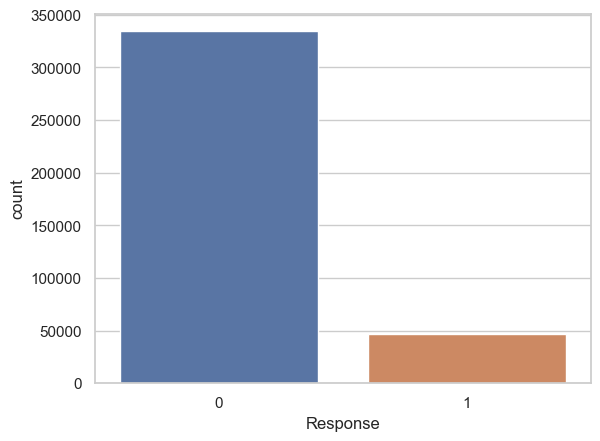

In [ ]:
sns.countplot(dataset.Response)

In [ ]:
dataset.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

# Distribution de l'âge des clients

<AxesSubplot:xlabel='Age', ylabel='Density'>

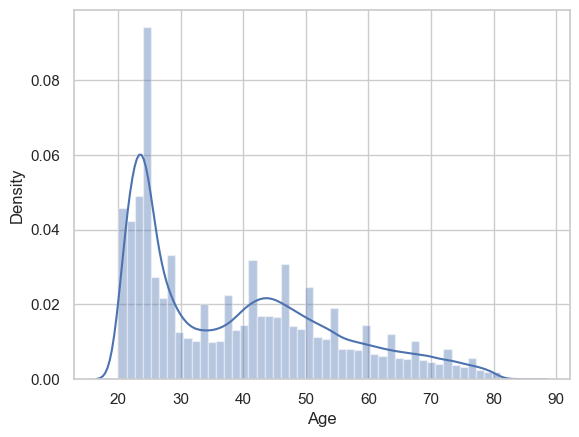

In [ ]:
sns.distplot(dataset.Age)

<AxesSubplot:ylabel='Age'>

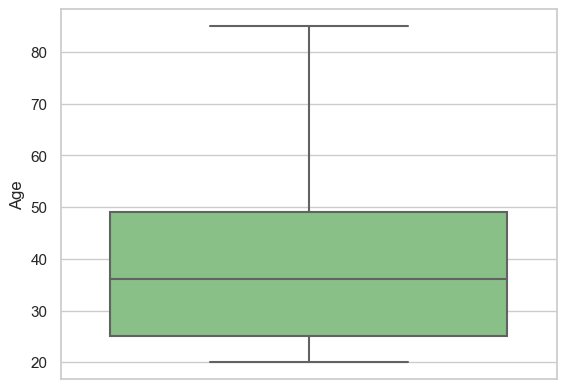

In [ ]:
sns.boxplot(y = 'Age', data = dataset,palette='Accent')

# Age Vs Prime annuelle

<AxesSubplot:xlabel='Age', ylabel='Annual_Premium'>

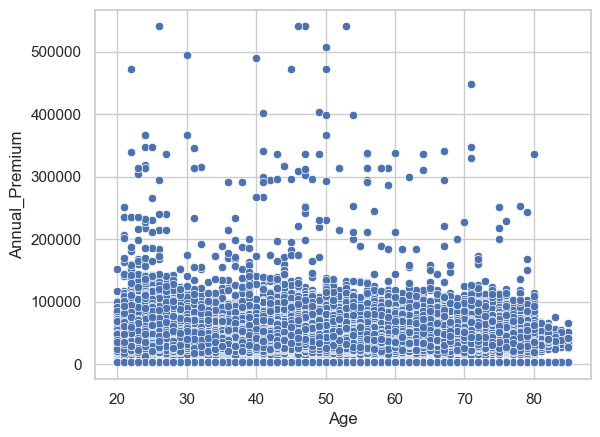

In [ ]:
sns.scatterplot(x=dataset['Age'],y=dataset['Annual_Premium'])

# Gender & Response

<AxesSubplot:xlabel='Gender', ylabel='count'>

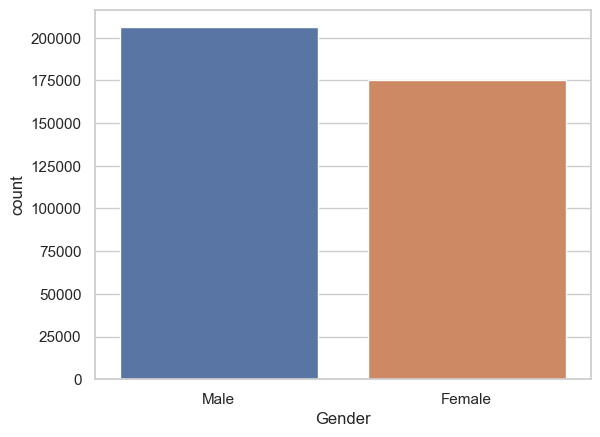

In [ ]:
sns.countplot(dataset.Gender)

In [ ]:
df=dataset.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()


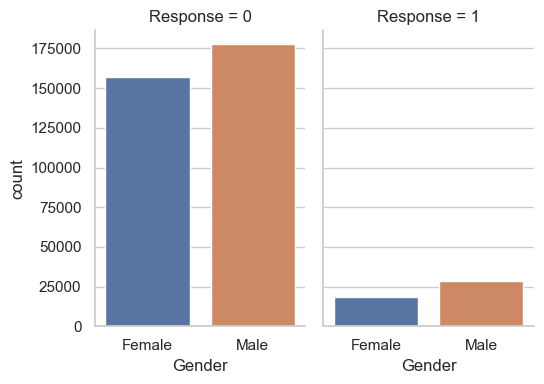

In [ ]:
g = sns.catplot(x="Gender", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

# Permis de conduire selon genre

In [ ]:
df=dataset.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()

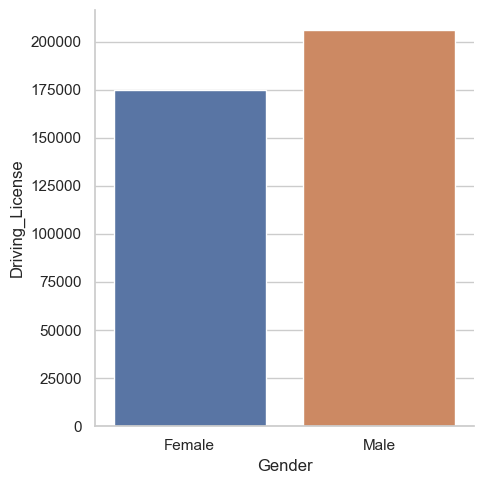

In [ ]:
sns.catplot(x="Gender", y="Driving_License",
                data=df, kind="bar");

# Clients ayant un contrat auto

<AxesSubplot:xlabel='Previously_Insured', ylabel='count'>

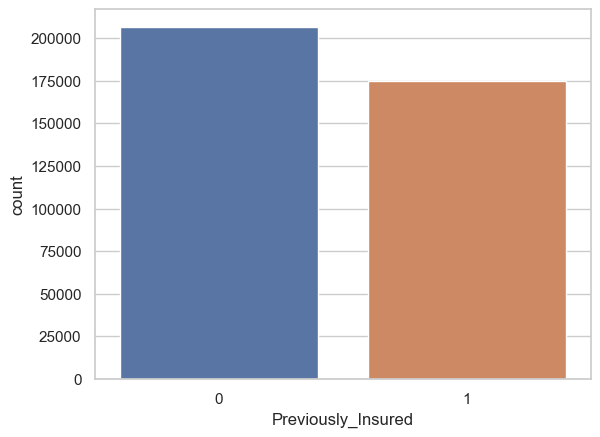

In [ ]:
sns.countplot(dataset.Previously_Insured)

# Age du véhicule 

<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

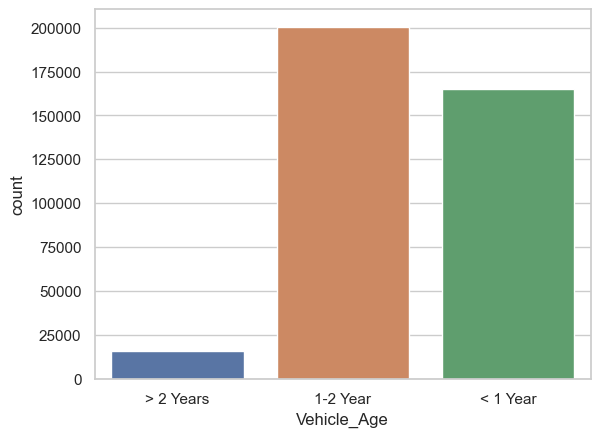

In [ ]:
sns.countplot(dataset.Vehicle_Age)

# Response & Age du véhicle

In [ ]:
df=dataset.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


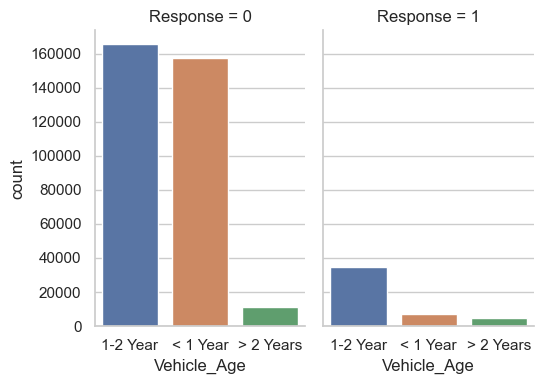

In [ ]:
g = sns.catplot(x="Vehicle_Age", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7)

# Customers having damaged vehicle

<AxesSubplot:xlabel='Vehicle_Damage', ylabel='count'>

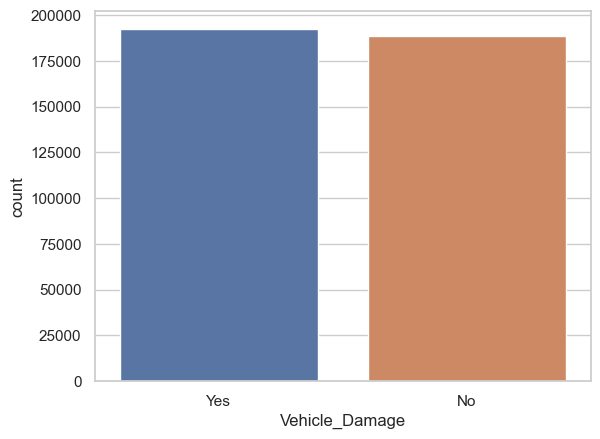

In [ ]:
sns.countplot(dataset.Vehicle_Damage)

# Précédent sinistre auto & Response

In [ ]:
df=dataset.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

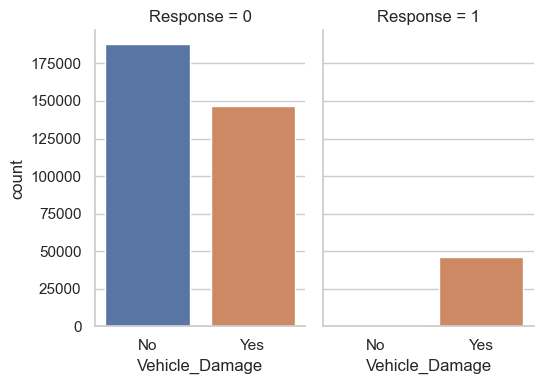

In [ ]:
g = sns.catplot(x="Vehicle_Damage", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7)

# Distribution de la prime annuelle

<AxesSubplot:xlabel='Annual_Premium', ylabel='Density'>

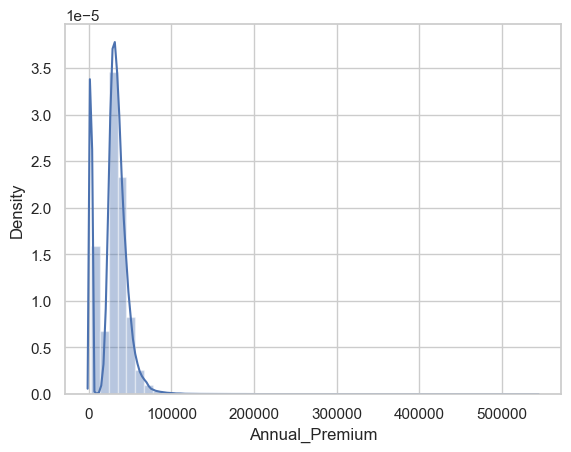

In [ ]:
sns.distplot(dataset.Annual_Premium)

<AxesSubplot:ylabel='Annual_Premium'>

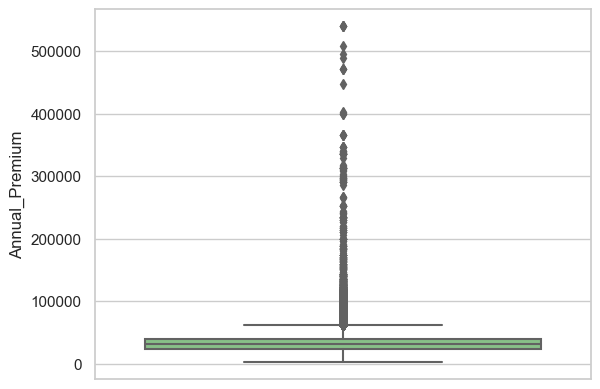

In [ ]:
sns.boxplot(y = 'Annual_Premium', data = dataset,palette='Accent')

# Vintage

Number of Days, Customer has been associated with the company

<AxesSubplot:xlabel='Vintage', ylabel='Density'>

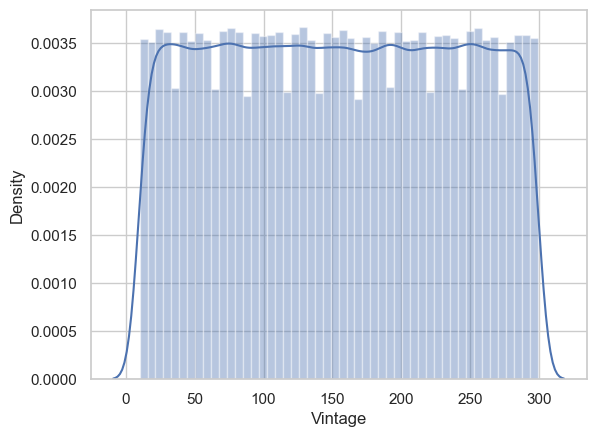

In [ ]:
sns.distplot(dataset.Vintage)

<font size="+3" color='#3a86ff'><b> Data Preprocessing </b> </font>

In [6]:
num_feat = ['Age','Vintage']
cat_feat = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age_lt_1_Year','Vehicle_Age_gt_2_Years','Vehicle_Damage_Yes','Region_Code','Policy_Sales_Channel']

In [7]:
dataset['Gender'] = dataset['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)

In [8]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [9]:
dataset=dataset.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
dataset['Vehicle_Age_lt_1_Year']=dataset['Vehicle_Age_lt_1_Year'].astype('int')
dataset['Vehicle_Age_gt_2_Years']=dataset['Vehicle_Age_gt_2_Years'].astype('int')
dataset['Vehicle_Damage_Yes']=dataset['Vehicle_Damage_Yes'].astype('int')

In [10]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
ss = StandardScaler()
dataset[num_feat] = ss.fit_transform(dataset[num_feat])


mm = MinMaxScaler()
dataset[['Annual_Premium']] = mm.fit_transform(dataset[['Annual_Premium']])

In [11]:
dataset=dataset.drop('id',axis=1)

In [12]:
for column in cat_feat:
    dataset[column] = dataset[column].astype('str')

In [62]:
dataset.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,0.333777,1,28.0,0,0.070366,26.0,0.748795,1,0,1,1
1,1,2.396751,1,3.0,0,0.057496,26.0,0.342443,0,0,0,0
2,1,0.527181,1,28.0,0,0.066347,26.0,-1.521998,1,0,1,1
3,1,-1.148985,1,11.0,1,0.048348,152.0,0.581474,0,1,0,0
4,0,-0.633242,1,41.0,1,0.046259,152.0,-1.378580,0,1,0,0


In [63]:
from sklearn.model_selection import train_test_split

train_target=dataset['Response']
train=dataset.drop(['Response'], axis = 1)
x_train,x_test,y_train,y_test = train_test_split(train,train_target, random_state = 123)

print(x_train.shape, y_train.shape, x_test.shape,y_test.shape)

(285831, 11) (285831,) (95278, 11) (95278,)


In [ ]:
x_train.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
       'Vehicle_Age_lt_1_Year', 'Vehicle_Age_gt_2_Years',
       'Vehicle_Damage_Yes'],
      dtype='object')

<font size="+3" color='#3a86ff'><b> Modélisation & Evaluation </b> </font>

**Tester différents modèles (sans et avec fine-tuning & échantillonnage)**

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

from scipy.stats import randint
import pickle
import xgboost as xgb

from sklearn.metrics import accuracy_score
# import packages for hyperparameters tuning

from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 

# Random Forest Classifier

In [ ]:
x_train.dtypes

Gender                     object
Age                       float64
Driving_License            object
Region_Code                object
Previously_Insured         object
Annual_Premium            float64
Policy_Sales_Channel       object
Vintage                   float64
Vehicle_Age_lt_1_Year      object
Vehicle_Age_gt_2_Years     object
Vehicle_Damage_Yes         object
dtype: object

In [ ]:
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,3,4,5,6,7,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [300]}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(x_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 10],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [300]},
                   random_state=101, verbose=1)

## Save model

In [ ]:
filename = 'rf_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
filename = 'rf_model.sav'

In [ ]:
rf_load = pickle.load(open(filename, 'rb'))

# Evaluate Model 

In [ ]:
y_pred=model.predict(x_test)

## Classification Report 

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     83666
           1       0.00      0.00      0.00     11612

    accuracy                           0.88     95278
   macro avg       0.44      0.50      0.47     95278
weighted avg       0.77      0.88      0.82     95278



(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

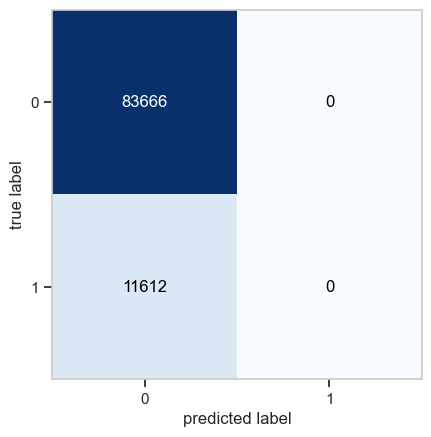

In [ ]:
# evaluate predictions
#!pip install mlxtend
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix
rf_pred=model.predict(x_test)
conf_mat_rf = confusion_matrix(y_test, rf_pred)
print(classification_report(y_test, rf_pred))
plot_confusion_matrix(conf_mat_rf)
#print('Confusion matrix:\n', conf_mat)

In [ ]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     83666
           1       0.00      0.00      0.00     11612

    accuracy                           0.88     95278
   macro avg       0.44      0.50      0.47     95278
weighted avg       0.77      0.88      0.82     95278



## ROC Curve & AUC of Random forest classifier

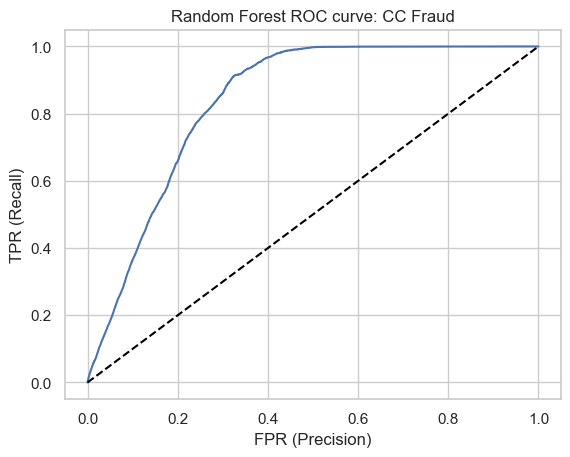

Area under curve (AUC):  0.8388025451930856


In [ ]:
y_score = model.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('Random Forest ROC curve: CC Fraud')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [ ]:
roc_auc_score(y_test, y_score)

0.8388025451930856

# XGBoost Classifier 

In [64]:
for column in cat_feat:
    x_train[column] = x_train[column].astype('float').round().astype('int')
    x_test[column] = x_test[column].astype('float').round().astype('int')


In [54]:
space={ 'max_depth': hp.quniform("max_depth", 3,18,1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 300,
        'seed': 0
      }

In [51]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( x_train, y_train), ( x_test, y_test)]
    
    clf.fit(x_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(x_test)
    y_score = model.predict_proba(x_test)[:,1]
    accuracy = accuracy_score(y_test, pred>0.5)
    Roc_Auc_Score = roc_auc_score(y_test, y_score)
    print ("ROC-AUC Score:",Roc_Auc_Score)
    print ("SCORE:", accuracy)
    return {'loss': -Roc_Auc_Score, 'status': STATUS_OK }


In [55]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [56]:
trials = Trials()

In [ ]:
best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)


In [ ]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

In [58]:
xgb_model=xgb.XGBClassifier(n_estimators = space['n_estimators'], max_depth = 15, gamma = 1.6869002012725165, reg_lambda = 0.8195327100820993,
                            reg_alpha = 127.0, min_child_weight=1.0,colsample_bytree = 0.5215498514458248 )
    

In [65]:
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5215498514458248, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=1.6869002012725165, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=1.0, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [66]:
filename = 'xgboost_model.sav'
pickle.dump(xgb_model, open(filename, 'wb'))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     83666
           1       0.00      0.00      0.00     11612

    accuracy                           0.88     95278
   macro avg       0.44      0.50      0.47     95278
weighted avg       0.77      0.88      0.82     95278



(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

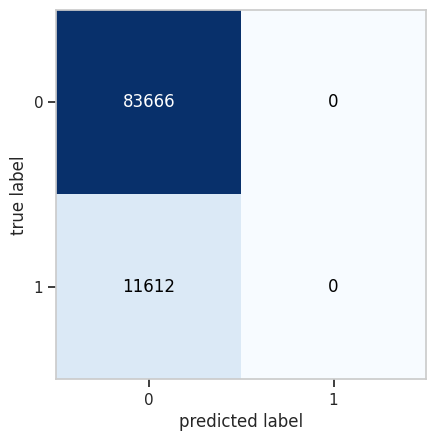

In [67]:
# evaluate predictions

from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix
xgb_pred=xgb_model.predict(x_test)
conf_mat_rf = confusion_matrix(y_test, xgb_pred)
print(classification_report(y_test, xgb_pred))
plot_confusion_matrix(conf_mat_rf)
#print('Confusion matrix:\n', conf_mat)

## ROC Curve & AUC of XGboost classifier

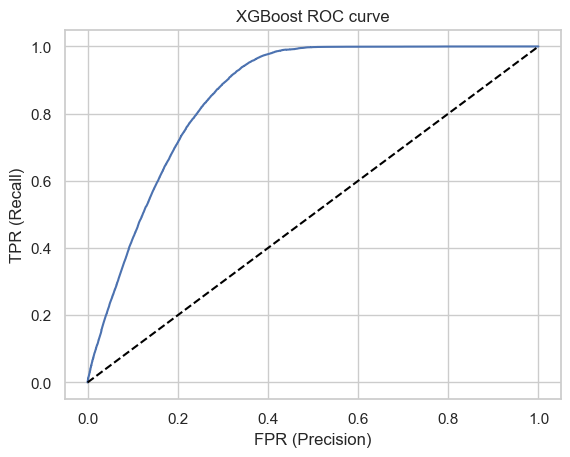

Area under curve (AUC):  0.854829646300676


In [ ]:
y_score = xgb_model.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('XGBoost ROC curve')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

### RANDOM SAMPLING : SMOTE
We balance the dataset by using random undersampling technical.

!pip install imblearn

In [22]:
from imblearn.pipeline import make_pipeline as make_pipeline_imb # To do our transformation in a unique time
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced

from collections import Counter

In [16]:
# the function that we will use to better evaluate the model
def print_results(headline, true_value, pred):
    print(headline)
    print("accuracy: {}".format(accuracy_score(true_value, pred)))
    print("precision: {}".format(precision_score(true_value, pred)))
    print("recall: {}".format(recall_score(true_value, pred)))
    print("f2: {}".format(fbeta_score(true_value, pred, beta=2)))

In [17]:
# Smote model

classifier = RandomForestClassifier

# build model with SMOTE imblearn
smote_pipeline = make_pipeline_imb(SMOTE(random_state=4), \
                                   classifier(criterion = 'entropy',
                                                n_estimators = 100,
                                                #max_depth=5,
                                                random_state = 123))

smote_model = smote_pipeline.fit(x_train, y_train)
smote_prediction = smote_model.predict(x_test)

#Showing the diference before and after the transformation used
print("normal data distribution: {}".format(Counter(train_target)))
X_smote, y_smote = SMOTE().fit_resample(dataset, train_target)
print("SMOTE data distribution: {}".format(Counter(y_smote)))

normal data distribution: Counter({0: 334399, 1: 46710})
SMOTE data distribution: Counter({1: 334399, 0: 334399})


              precision    recall  f1-score   support

           0       0.92      0.85      0.89     83666
           1       0.32      0.50      0.39     11612

    accuracy                           0.81     95278
   macro avg       0.62      0.68      0.64     95278
weighted avg       0.85      0.81      0.83     95278



(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

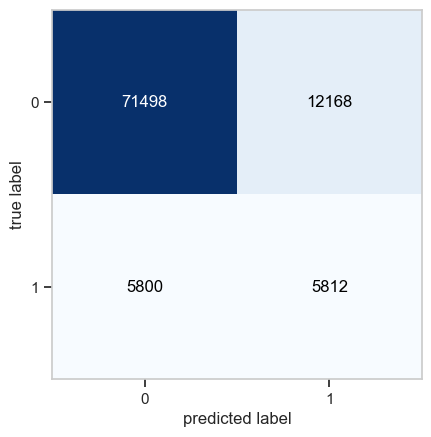

In [ ]:
# evaluate predictions
#!pip install mlxtend
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix

smote_prediction = smote_model.predict(np.array(x_test))
conf_mat_lgb = confusion_matrix(y_test, smote_prediction)
print(classification_report(y_test, smote_prediction))
plot_confusion_matrix(conf_mat_lgb)
#print('Confusion matrix:\n', conf_mat)

## Next Step  
A rendre le **29/03/25**

#### 1- Optimiser le modèle utilisant la technique SMOTE. Tester d'autres modèles

#### 2- Tester d'autres approches de sampling (undersampling, etc.)

## 1 Optimisation du Modèle avec Smote et Test d'Autres Modeles.

# 1-1 ptimisation de RAndomForest avec Smote

Pour optimiser le modèle RandomForestClassifier utilisé avec Smote ,nous ajustons les Hyperparamètres vie une recherche aléatoire (RandomizedsearchCV) et évaluons les performances avec le F1-score, adapté aux données déséquilibrées.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline


 # Definir les parametres tester
param_grid = {
    'randomforestclassifier__n_estimators': [50, 100],  
    'randomforestclassifier__max_depth': [None, 10, 20],  
    'randomforestclassifier__min_samples_split': [5, 10], 
    'randomforestclassifier__min_samples_leaf': [2, 4]  
}
# Pipeline avec SMOTE et RandomForest
smote_rf_pipeline = make_pipeline(
      SMOTE(random_state=4),
      RandomForestClassifier(random_state=123))
 # Recherche aleatoire
random_search = RandomizedSearchCV(
      smote_rf_pipeline,
      param_distributions=param_grid,
      n_iter=10, cv=5, scoring='f1', n_jobs=-1, random_state=42)
 # Entraner et valuer
random_search.fit(x_train, y_train)
print("Meilleurs param tres :", random_search.best_params_)
print("Meilleur F1-score :", random_search.best_score_)
smote_rf_optimized = random_search.best_estimator_
smote_rf_pred = smote_rf_optimized.predict(x_test)
print(classification_report(y_test, smote_rf_pred))

## 1-2 Test d'Autres MOdéles: XGBoost

Nous testons également XGBoost, un algorithme performant pour les données déséquilibrées,avec SMOTE.

              precision    recall  f1-score   support

           0       0.95      0.79      0.86     83666
           1       0.31      0.70      0.43     11612

    accuracy                           0.78     95278
   macro avg       0.63      0.74      0.65     95278
weighted avg       0.87      0.78      0.81     95278



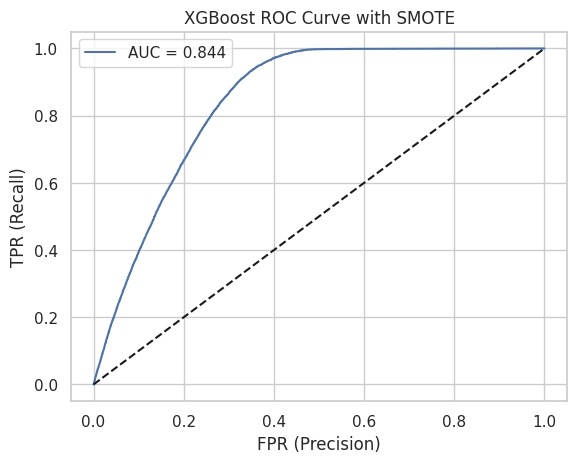

In [69]:
from xgboost import XGBClassifier
 
 
 # Pipeline avec SMOTE et XGBoost
smote_xgb_pipeline = make_pipeline_imb(
      SMOTE(random_state=4),
      XGBClassifier(use_label_encoder=False,
          eval_metric='logloss', random_state=123)
 )
 # Entra ner et valuer
smote_xgb_model = smote_xgb_pipeline.fit(x_train, y_train)
smote_xgb_pred = smote_xgb_model.predict(x_test)
print(classification_report(y_test, smote_xgb_pred))
 
 # Courbe ROC
y_score_xgb = smote_xgb_model.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score_xgb)
plt.plot(fpr, tpr, label=f"AUC = {auc(fpr, tpr):.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
plt.title('XGBoost ROC Curve with SMOTE')
plt.legend()
plt.show()

# 2 TEST D'Autres Approches de Sampling

# 2-1 Undersampling avec RandomUndersampler

L'undersampling réduit la classe majoritaire pour equilibrer les données.

In [70]:
from imblearn.under_sampling import RandomUnderSampler


 # Pipeline avec RandomUnderSampler
undersample_pipeline = make_pipeline_imb (
    RandomUnderSampler(random_state=4),
    RandomForestClassifier(criterion='entropy',
       n_estimators=100, random_state=123)
)
 # Entra ner et valuer
undersample_model = undersample_pipeline.fit(x_train, y_train)
undersample_pred = undersample_model.predict(x_test)
 
 # Distribution
X_undersample, y_undersample = RandomUnderSampler(random_state=4).fit_resample(x_train,y_train)
print ("Distribution apr s undersampling :",
    Counter(y_undersample))
print(classification_report(y_test, undersample_pred))

Distribution apr s undersampling : Counter({0: 35098, 1: 35098})
              precision    recall  f1-score   support

           0       0.98      0.68      0.81     83666
           1       0.28      0.89      0.43     11612

    accuracy                           0.71     95278
   macro avg       0.63      0.79      0.62     95278
weighted avg       0.89      0.71      0.76     95278



# 2-2 Combinaison SMOTE+UNDERSAMPLING AVEC SMOTEENN .
 
 SMOTEENN combine oversampling (SMOTE) et undersampling (ENN) pour nettoyer les données .

In [71]:
from imblearn.combine import SMOTEENN
 
 # Pipeline avec SMOTEENN
smoteenn_pipeline = make_pipeline_imb(
      SMOTEENN(random_state=4),
      RandomForestClassifier (criterion='entropy',
          n_estimators=100, random_state=123)
)
# Entrainer et évaluer
smoteenn_model = smoteenn_pipeline.fit(x_train, y_train)
smoteenn_pred = smoteenn_model.predict(x_test)

 # Distribution
X_smoteenn, y_smoteenn = SMOTEENN(random_state=4).fit_resample(x_train, y_train)
print("Distribution apr s SMOTEENN :", Counter(y_smoteenn))
print(classification_report(y_test, smoteenn_pred))

Distribution apr s SMOTEENN : Counter({1: 194923, 0: 179186})
              precision    recall  f1-score   support

           0       0.96      0.75      0.84     83666
           1       0.30      0.79      0.44     11612

    accuracy                           0.75     95278
   macro avg       0.63      0.77      0.64     95278
weighted avg       0.88      0.75      0.79     95278



## COMPARAISON DES APPROCHES 

Nous camparons les performances des différentes approches avec un tableau recapitilatif.

In [72]:
from sklearn.metrics import precision_score, recall_score,f1_score

 
 # Fonction d’ évaluation
def evaluate_model(y_true, y_pred, model_name):
      return  {
       'Model': model_name,
       'Precision': precision_score(y_true, y_pred),
       'Recall': recall_score(y_true, y_pred),
       'F1-Score': f1_score(y_true, y_pred)
 }
 # Résultats
results =[
        evaluate_model(y_test, smote_prediction, "SMOTE + RF"),
        evaluate_model(y_test, smote_rf_pred, "SMOTE + RF Optimized"),
        evaluate_model(y_test, smote_xgb_pred, "SMOTE + XGBoost"),
        evaluate_model(y_test, undersample_pred, "Undersampling + RF"),
        evaluate_model(y_test, smoteenn_pred, "SMOTEENN + RF")

]
 
 # Afficher
import pandas as pd
print(pd.DataFrame(results))

                  Model  Precision    Recall  F1-Score
0            SMOTE + RF   0.330896  0.479332  0.391517
1  SMOTE + RF Optimized   0.302600  0.787720  0.437237
2       SMOTE + XGBoost   0.312199  0.697124  0.431262
3    Undersampling + RF   0.280498  0.886497  0.426156
4         SMOTEENN + RF   0.303821  0.785481  0.438162
